# CH4 matplotlib으로 그래프 그리기

## 1. 선 그래프

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx',header=0)
df.head(7)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,NaN,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138


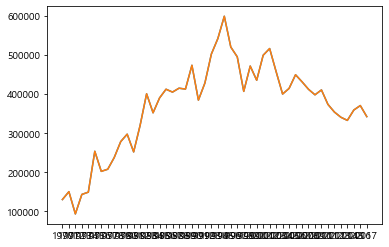

In [49]:
# Nan 을 이전 값으로 대체 : df.filena(method='ffill')
df = df.fillna(method='ffill')
df.head()


# 전출지가 '서울특별시' 에서 다른 도시로 이전한 인구수의 분포를 분석
mask = (df['전출지별']=='서울특별시')&(df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul

# 전출지별의 값은 모두 '서울특별시'이므로 컬럼을 삭제
df_seoul = df_seoul.drop('전출지별',axis=1)
df_seoul

# 전입지별 컬럼명을 전입지로 변경
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul

# df_seoul 에서 전입지가 '경기도'인 자료만 추출
# 전입지 컬럼을 인덱스로 설정
df_seoul.set_index('전입지',inplace=True)
sr_one = df_seoul.loc['경기도']
sr_one

# 기본 선 그래프 그리기
plt.plot(sr_one)

plt.plot(sr_one.index, sr_one.values)

In [50]:
# matplotlib 한글 폰트 문제 해결
from matplotlib import rc

rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [66]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
import platform

if platform.system() == 'Darwin':         # mac
    plt.rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)



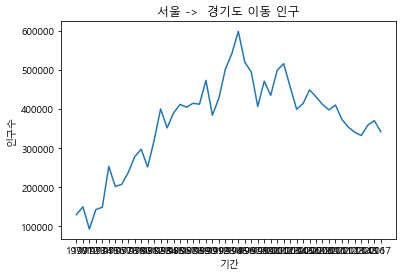

In [54]:
# 그래프에 제목 추가, 축이름 추가
# 서울 ->  경기도 이동 인구
# x축이름 -> '기간', y축이름 -> '인구수'
# 기본 선 그래프 그리기
plt.plot(sr_one)
plt.title('서울 ->  경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('인구수')
plt.show()

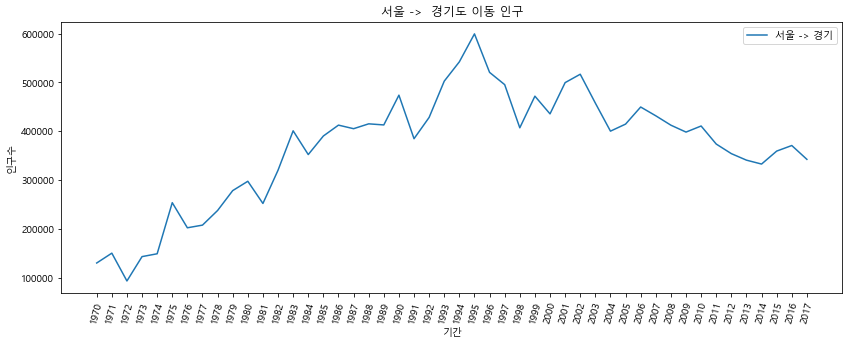

In [64]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정

# x축 눈금 라벨을 회전 : plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 75)   # rotation = 숫자는 회전 각도
plt.plot(sr_one)
plt.title('서울 ->  경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('인구수')
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

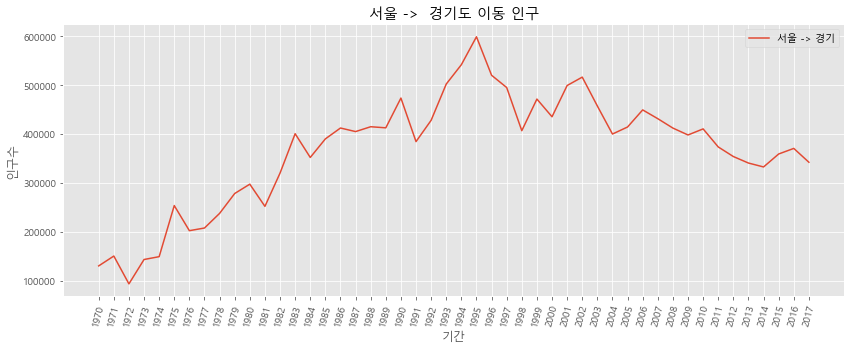

In [65]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정
plt.style.use('ggplot')
# x축 눈금 라벨을 회전 : plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 75)   # rotation = 숫자는 회전 각도
plt.plot(sr_one)
plt.title('서울 ->  경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('인구수')
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

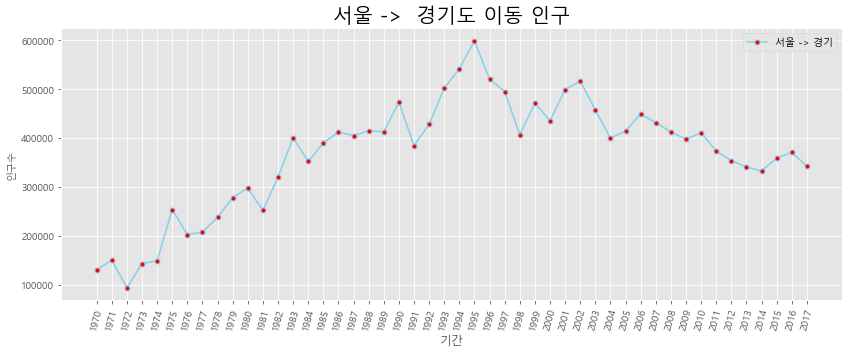

In [74]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정
# plt.style.use('ggplot')
# x축 눈금 라벨을 회전 : plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.xticks(size = 10, rotation = 75)   # rotation = 숫자는 회전 각도
plt.plot(sr_one,marker='o',markersize =5 ,color='skyblue',
        mfc='red')
plt.title('서울 ->  경기도 이동 인구',size=20)
plt.xlabel('기간')
plt.ylabel('인구수',size=10)
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

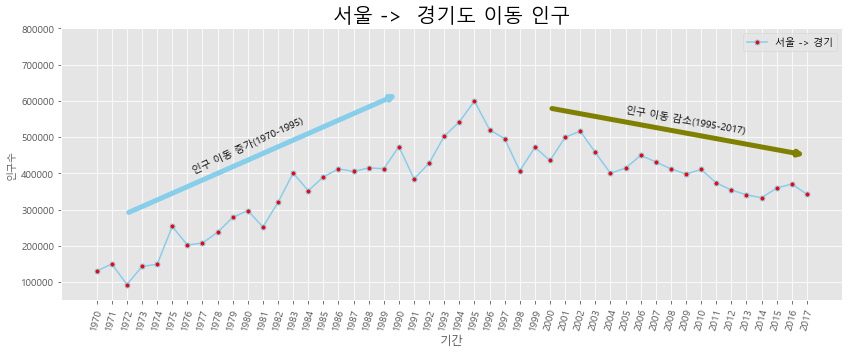

In [91]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정
# plt.style.use('ggplot')
# x축 눈금 라벨을 회전 : plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.xticks(size = 10, rotation = 75)   # rotation = 숫자는 회전 각도
plt.plot(sr_one,marker='o',markersize =5 ,color='skyblue',
        mfc='red')
plt.title('서울 ->  경기도 이동 인구',size=20)
plt.xlabel('기간')
plt.ylabel('인구수',size=10)
plt.legend(labels=['서울 -> 경기'], loc='best')

# 설명 추가
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시
plt.annotate('',
             xy=(20,620000),       #화살표의 머리부분(끝점)
            xytext = (2,290000),    #화살표의 꼬리부분(시작점)
            arrowprops = dict(arrowstyle='->',color='skyblue',lw=5)
            )   
plt.annotate('',
             xy=(47,450000),       #화살표의 머리부분(끝점)
            xytext = (30,580000),    #화살표의 꼬리부분(시작점)
            arrowprops = dict(arrowstyle='->',color='olive',lw=5)
            ) 
plt.annotate("인구 이동 증가(1970-1995)",
             xy = (10,400000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=10
            )
plt.annotate("인구 이동 감소(1995-2017)",
             xy = (39,510000),
             rotation=-10,
             va='baseline',
             ha='center',
             fontsize=10
            )

plt.show()

C:\Users\HPE\AppData\Local\Temp\ipykernel_3988\2141546419.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\HPE\AppData\Local\Temp\ipykernel_3988\2141546419.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


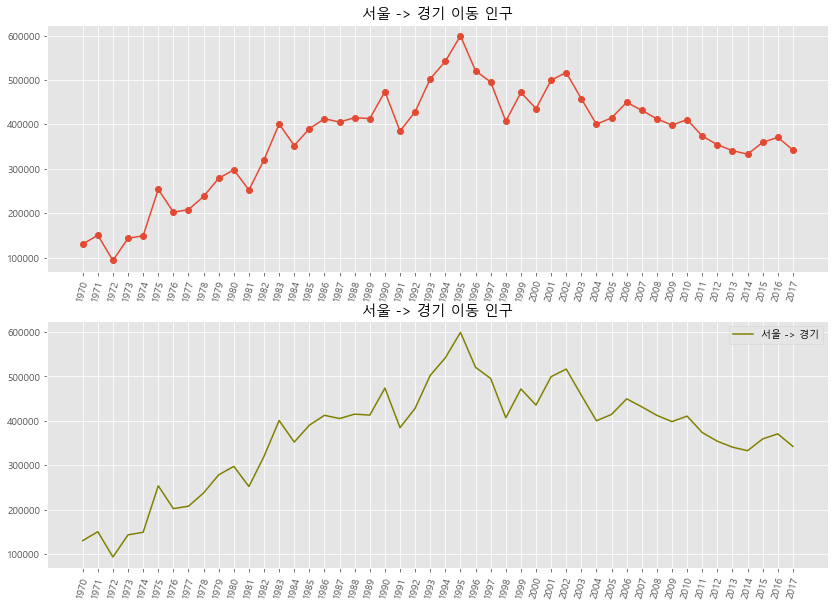

In [99]:
# 한 화면에 두개의 그래프 그리기 : add_subplot()

fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(2,1,1) # 한 행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2,1,2) 

# axe 객체에 plot함수로 그래프 그리기
ax1.plot(sr_one,marker='o')
ax2.plot(sr_one,color='olive',label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_title('서울 -> 경기 이동 인구')
ax2.set_title('서울 -> 경기 이동 인구')
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)
plt.show()

In [105]:
col_years = list(map(str,range(1970,2018))) # 년도를 1970~2017
col_years

df_1 = df_seoul.loc[['충청남도','경상북도','강원도'],col_years]
df_1


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


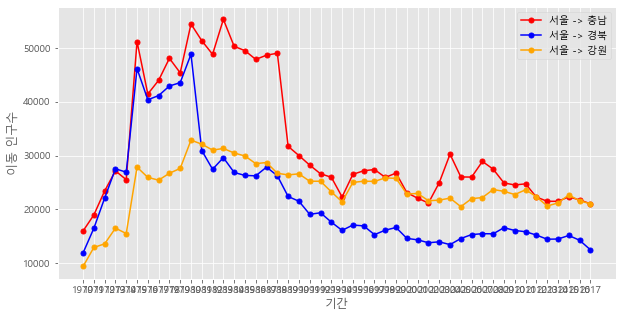

In [113]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,1,1)

# axe 에 그래프 추가
ax.plot(col_years,df_1.loc['충청남도',:],color='red',
        marker='o',label = '서울 -> 충남',markersize=5)
ax.plot(col_years,df_1.loc['경상북도',:],color='blue',
        marker='o',label = '서울 -> 경북',markersize=5)
ax.plot(col_years,df_1.loc['강원도',:],color='orange',
        marker='o',label = '서울 -> 강원',markersize=5)

ax.legend(loc='best')

# x label 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

plt.show()



In [114]:
# df_2 -> 충청남도, 경상북도, 강원도, 전라남도로 이동한 자료
# 1980년도에서 2016년도 까지의 자료
col_years = list(map(str,range(1980,2017))) # 저장된 자료가 str

df_2 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

df_2 

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,28898,27458,24889,24522,24723,22269,21486,21473,22299,21741
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,15448,15425,16569,16042,15818,15191,14420,14456,15113,14236
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,17717,16601,17468,16429,15974,14765,14187,14591,14598,13065


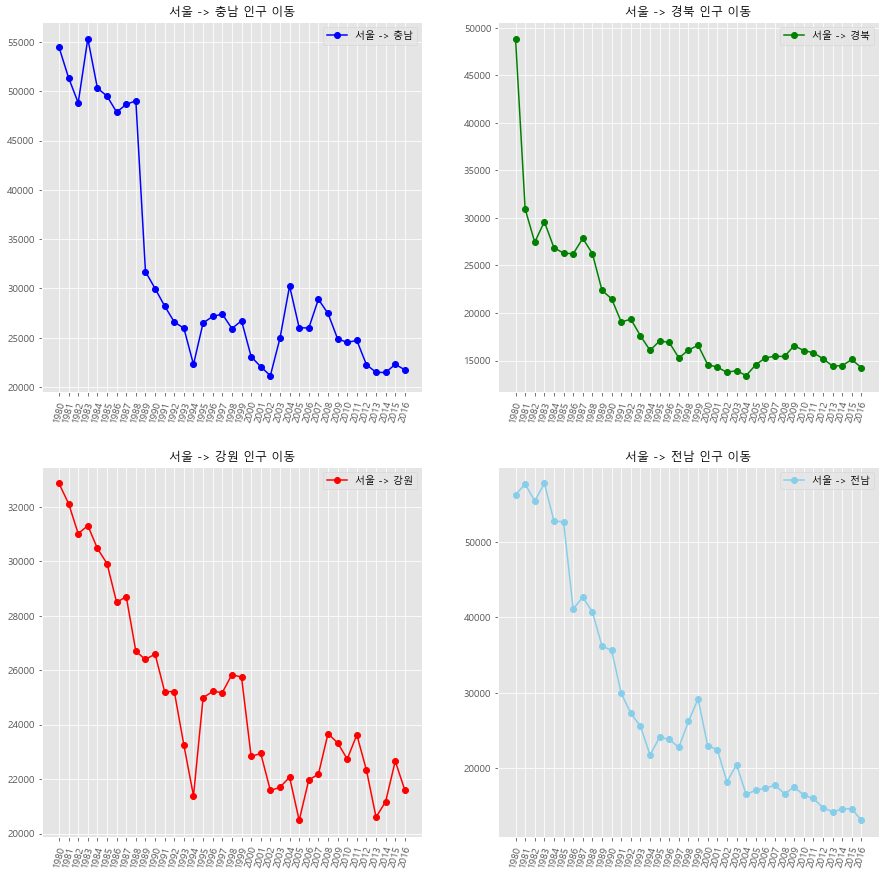

In [120]:
# 그래프 : 각 도시를 하나의 그래프에, 한 페이지 4개의 그래프로
fig = plt.figure(figsize=(15,15))

# 충청남도 그래프 지정
ax1 = fig.add_subplot(2,2,1) # 충남
ax2 = fig.add_subplot(2,2,2) # 경북
ax3 = fig.add_subplot(2,2,3) # 강원도
ax4 = fig.add_subplot(2,2,4) # 전남

# 각 그래프 객체에 그래프 출력
ax1.plot(col_years,df_2.loc['충청남도',:], marker='o', color='blue',
         label = '서울 -> 충남')
ax2.plot(col_years,df_2.loc['경상북도',:], marker='o', color='green',
         label = '서울 -> 경북')
ax3.plot(col_years,df_2.loc['강원도',:], marker='o', color='red',
         label = '서울 -> 강원')
ax4.plot(col_years,df_2.loc['전라남도',:], marker='o', color='skyblue',
         label = '서울 -> 전남')

# 범례 표시
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

# 각 그래프의 제목 추가
ax1.set_title('서울 -> 충남 인구 이동',size=12)
ax2.set_title('서울 -> 경북 인구 이동',size=12)
ax3.set_title('서울 -> 강원 인구 이동',size=12)
ax4.set_title('서울 -> 전남 인구 이동',size=12)

# 각 그래프의 xticks 지정
ax1.set_xticks(ticks=col_years,labels=col_years,rotation=75)
ax2.set_xticks(ticks=col_years,labels=col_years,rotation=75)
ax3.set_xticks(ticks=col_years,labels=col_years,rotation=75)
ax4.set_xticks(ticks=col_years,labels=col_years,rotation=75)

plt.show()